In [28]:
from google.colab import files
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
%cd "/content/drive/MyDrive/"

/content/drive/MyDrive


In [14]:
# !unzip recycling\ waste.zip

In [15]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [16]:
# let's prepare the data and generate the data

from keras_preprocessing.image import ImageDataGenerator

gen_train = ImageDataGenerator(rescale = 1/255, shear_range = 0.2, zoom_range = 0.2, 
                               brightness_range = (0.1, 0.5), horizontal_flip=True)

train_data = gen_train.flow_from_directory("/content/drive/MyDrive/recycling waste",
                                           target_size = (224, 224), batch_size = 32, class_mode="categorical")


Found 8369 images belonging to 9 classes.


In [17]:
# let's create a model
# here i'm going to use VGG16 model's parameter to solve this problem

from tensorflow.keras.applications.vgg16 import VGG16

# here i'm going to take input shape, weights and bias from imagenet and include top False means
# i want to add input, flatten and output layer by my self

vgg16 = VGG16(input_shape = (224, 224, 3), weights = "imagenet", include_top = False)

In [18]:
# now vgg16 weights are already train so i don't want to train that weights again
# so let's make trainable = False

for layer in vgg16.layers:
  layer.trainable = False

In [19]:
# let's add flatten layer or let's connect VGG16 with our own flatten layer

from tensorflow.keras import layers

x = layers.Flatten()(vgg16.output)

In [20]:
# now let's add output layers or prediction layer

prediction = layers.Dense(units = 9, activation="softmax")(x)

# creating a model object

model = tf.keras.models.Model(inputs = vgg16.input, outputs=prediction)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [21]:
# now let's compile the model

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics =["accuracy"])

result = model.fit_generator(train_data, epochs = 28, steps_per_epoch=len(train_data))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


Epoch 1/28
262/262 [==============================] - 2538s 10s/step - loss: 1.9064 - accuracy: 0.3444
Epoch 2/28
262/262 [==============================] - 170s 647ms/step - loss: 1.5950 - accuracy: 0.4520
Epoch 3/28
262/262 [==============================] - 169s 647ms/step - loss: 1.5237 - accuracy: 0.4735
Epoch 4/28
262/262 [==============================] - 171s 651ms/step - loss: 1.4332 - accuracy: 0.5126
Epoch 5/28
262/262 [==============================] - 169s 644ms/step - loss: 1.3626 - accuracy: 0.5396
Epoch 6/28
262/262 [==============================] - 170s 648ms/step - loss: 1.3037 - accuracy: 0.5499
Epoch 7/28
262/262 [==============================] - 169s 643ms/step - loss: 1.2562 - accuracy: 0.5673
Epoch 8/28
262/262 [==============================] - 168s 643ms/step - loss: 1.1846 - accuracy: 0.5957
Epoch 9/28
262/262 [==============================] - 168s 642ms/step - loss: 1.2058 - accuracy: 0.5814
Epoch 10/28
262/262 [==============================] - 168s 642ms

In [22]:
from tensorflow.keras.preprocessing import image
output_class = ["batteries", "clothes", "e-waste", "glass", "light blubs", "metal", "organic", "paper", "plastic"]
def waste_prediction(new_image):
  test_image = image.load_img(new_image, target_size = (224,224))
  plt.axis("off")
  plt.imshow(test_image)
  plt.show()
 
  test_image = image.img_to_array(test_image) / 255
  test_image = np.expand_dims(test_image, axis=0)

  predicted_array = model.predict(test_image)
  predicted_value = output_class[np.argmax(predicted_array)]
  predicted_accuracy = round(np.max(predicted_array) * 100, 2)

  print("Your waste material is ", predicted_value, " with ", predicted_accuracy, " % accuracy")


Saving toy.jpg to toy.jpg


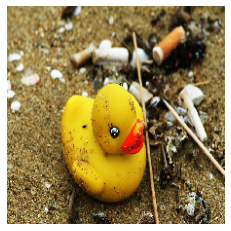

1/1 [==============================] - 1s 797ms/step
Your waste material is  plastic  with  99.97  % accuracy


In [29]:
uploaded = files.upload()
waste_prediction("toy.jpg")

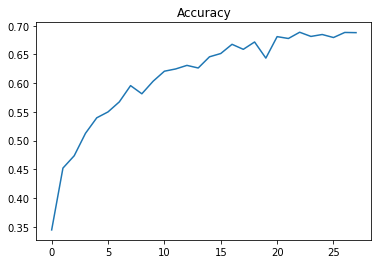

In [30]:
plt.title("Accuracy")
plt.plot(result.history["accuracy"])
plt.show()

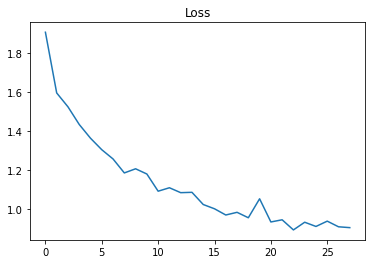

In [31]:
plt.title("Loss")
plt.plot(result.history["loss"])
plt.show()

In [32]:
model.save("classifyWaste.h5")